<div style="
    text-align: center;
    padding: 35px 25px;
    border-radius: 14px;
    background: linear-gradient(135deg, #fdf1ff, #fff0f7);
    border: 1px solid #edd9ff;
    margin-bottom: 35px;
    font-family: Arial, sans-serif;
">

  <!-- Title -->
  <h1 style="
      color: #6a1b9a;
      font-size: 38px;
      margin-bottom: 8px;
      font-weight: 700;
  ">
    🏗️ Concrete Compressive Strength
  </h1>

  <h2 style="
      color: #ad1457;
      font-size: 22px;
      margin-top: 0;
      font-weight: 500;
  ">
    Exploratory Data Analysis & Predictive Modeling
  </h2>

  <!-- Author & Objective -->
  <p style="
      font-size: 15.5px;
      color: #555;
      margin-top: 18px;
      line-height: 1.6;
  ">
    <b>Author:</b> Muhammad Abdullah<br>
    <b>Objective:</b> Understand how concrete mix components and curing age affect compressive strength using
    <b>data-driven analysis</b> and <b>machine learning</b>.
  </p>

  <hr style="
      width: 65%;
      border: none;
      border-top: 1px solid #e6c7ff;
      margin: 28px auto;
  ">

  <!-- Project Overview -->
  <h3 style="
      color: #7b1fa2;
      font-size: 20px;
      margin-bottom: 10px;
  ">
    📌 Project Overview
  </h3>

  <p style="
      font-size: 15.5px;
      color: #444;
      max-width: 900px;
      margin: 0 auto 15px auto;
      line-height: 1.7;
  ">
    Concrete compressive strength is a critical indicator of structural performance.
    In this project, we conduct a <b>comprehensive exploratory data analysis (EDA)</b> and develop
    <b>predictive models</b> to uncover how various mix design parameters influence concrete strength.
  </p>

  <p style="
      font-size: 15.5px;
      color: #444;
      margin-bottom: 18px;
  ">
    Key factors analyzed include:
  </p>


  <p style="
      font-size: 15.5px;
      color: #444;
  ">
    and their combined impact on <b>compressive strength of concrete</b>.
  </p>

  <hr style="
      width: 55%;
      border: none;
      border-top: 1px solid #f0cce6;
      margin: 28px auto;
  ">

  <!-- Notebook Coverage -->
  <h3 style="
      color: #7b1fa2;
      font-size: 20px;
      margin-bottom: 10px;
  ">
    🧪 What This Notebook Covers
  </h3>

  <ul style="
      list-style: none;
      padding: 0;
      margin: 0 auto 25px auto;
      max-width: 520px;
      color: #4a4a4a;
      font-size: 15.5px;
      line-height: 1.9;
  ">
    <li>✔️ Data Understanding & Cleaning</li>
    <li>✔️ Univariate, Bivariate & Multivariate Analysis</li>
    <li>✔️ Feature Engineering & Validation</li>
    <li>✔️ Correlation & Multicollinearity Checks</li>
    <li>✔️ Model Training & Evaluation</li>
  </ul>

  <hr style="
      width: 45%;
      border: none;
      border-top: 1px solid #e6c7ff;
      margin: 28px auto;
  ">

  <!-- Goal -->
  <h3 style="
      color: #7b1fa2;
      font-size: 20px;
      margin-bottom: 10px;
  ">
    🎯 Goal
  </h3>

  <p style="
      font-size: 15.5px;
      color: #444;
      max-width: 850px;
      margin: 0 auto;
      line-height: 1.7;
  ">
    To develop a <b>robust, interpretable, and accurate predictive model</b> for concrete compressive strength
    while ensuring alignment with <b>civil engineering principles</b> and
    <b>machine learning best practices</b>.
  </p>

</div>


## Step 1. Basic Setup & Data Loading

## 1.1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
# Show all columns
pd.set_option('display.max_columns', None)

## 1.2 Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/concrete-compressive-strength-dataset/Concrete Compressive Strength.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440188,353.3,12.174719,28754.55,5.291503
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937235,335.4,11.113019,26736.87,3.741657
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749597,345.7,7.272371,46850.00,5.291503
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857140,380.0,6.022534,60648.00,5.291503
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248700,338.2,11.266723,29922.84,5.291503


## 1.3 Data Inspection

In [3]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'water_cement_ratio', 'total_binder',
       'aggregate_to_cement', 'cement_water_interaction',
       'age_strength_proxy'],
      dtype='object')

In [4]:
df.shape

(1030, 14)

In [5]:
df.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
265,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3,15.62,0.576575,333.0,5.326711,63936.00,1.732051
654,385.0,0.0,136.0,158.0,20.0,903.0,768.0,28,55.55,0.410389,521.0,4.340248,60830.00,5.291503
229,425.0,106.3,0.0,151.4,18.6,936.0,803.7,56,64.90,0.356234,531.3,4.093402,64345.00,7.483315
745,290.4,0.0,96.2,168.1,9.4,961.2,865.0,100,48.97,0.578855,386.6,6.288546,48816.24,10.000000
882,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14,33.70,0.724118,387.7,8.561084,33007.10,3.741657


## Step 2: Data Exploration

In [6]:
# check null values
df.isnull().sum()

cement                      0
slag                        0
ash                         0
water                       0
superplastic                0
coarseagg                   0
fineagg                     0
age                         0
strength                    0
water_cement_ratio          0
total_binder                0
aggregate_to_cement         0
cement_water_interaction    0
age_strength_proxy          0
dtype: int64

In [7]:
# check duplicates values
df.duplicated().sum()

np.int64(25)

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440188,353.3,12.174719,28754.55,5.291503
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937235,335.4,11.113019,26736.87,3.741657
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749597,345.7,7.272371,46850.00,5.291503
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857140,380.0,6.022534,60648.00,5.291503
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248700,338.2,11.266723,29922.84,5.291503


In [9]:
# summary statistics
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748263,409.252039,7.199021,50868.988301,5.774836
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314003,92.780669,2.882574,19585.735383,3.510750
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266892,200.000000,3.097753,19584.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533332,336.425000,4.875033,33438.440000,2.645751
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675346,391.300000,6.535102,48816.240000,5.291503
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935160,483.700000,9.240795,63552.000000,7.483315
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882334,640.000000,17.931197,108300.000000,19.104973


## Step 3: Univariate Analysis (All Numeric Features)

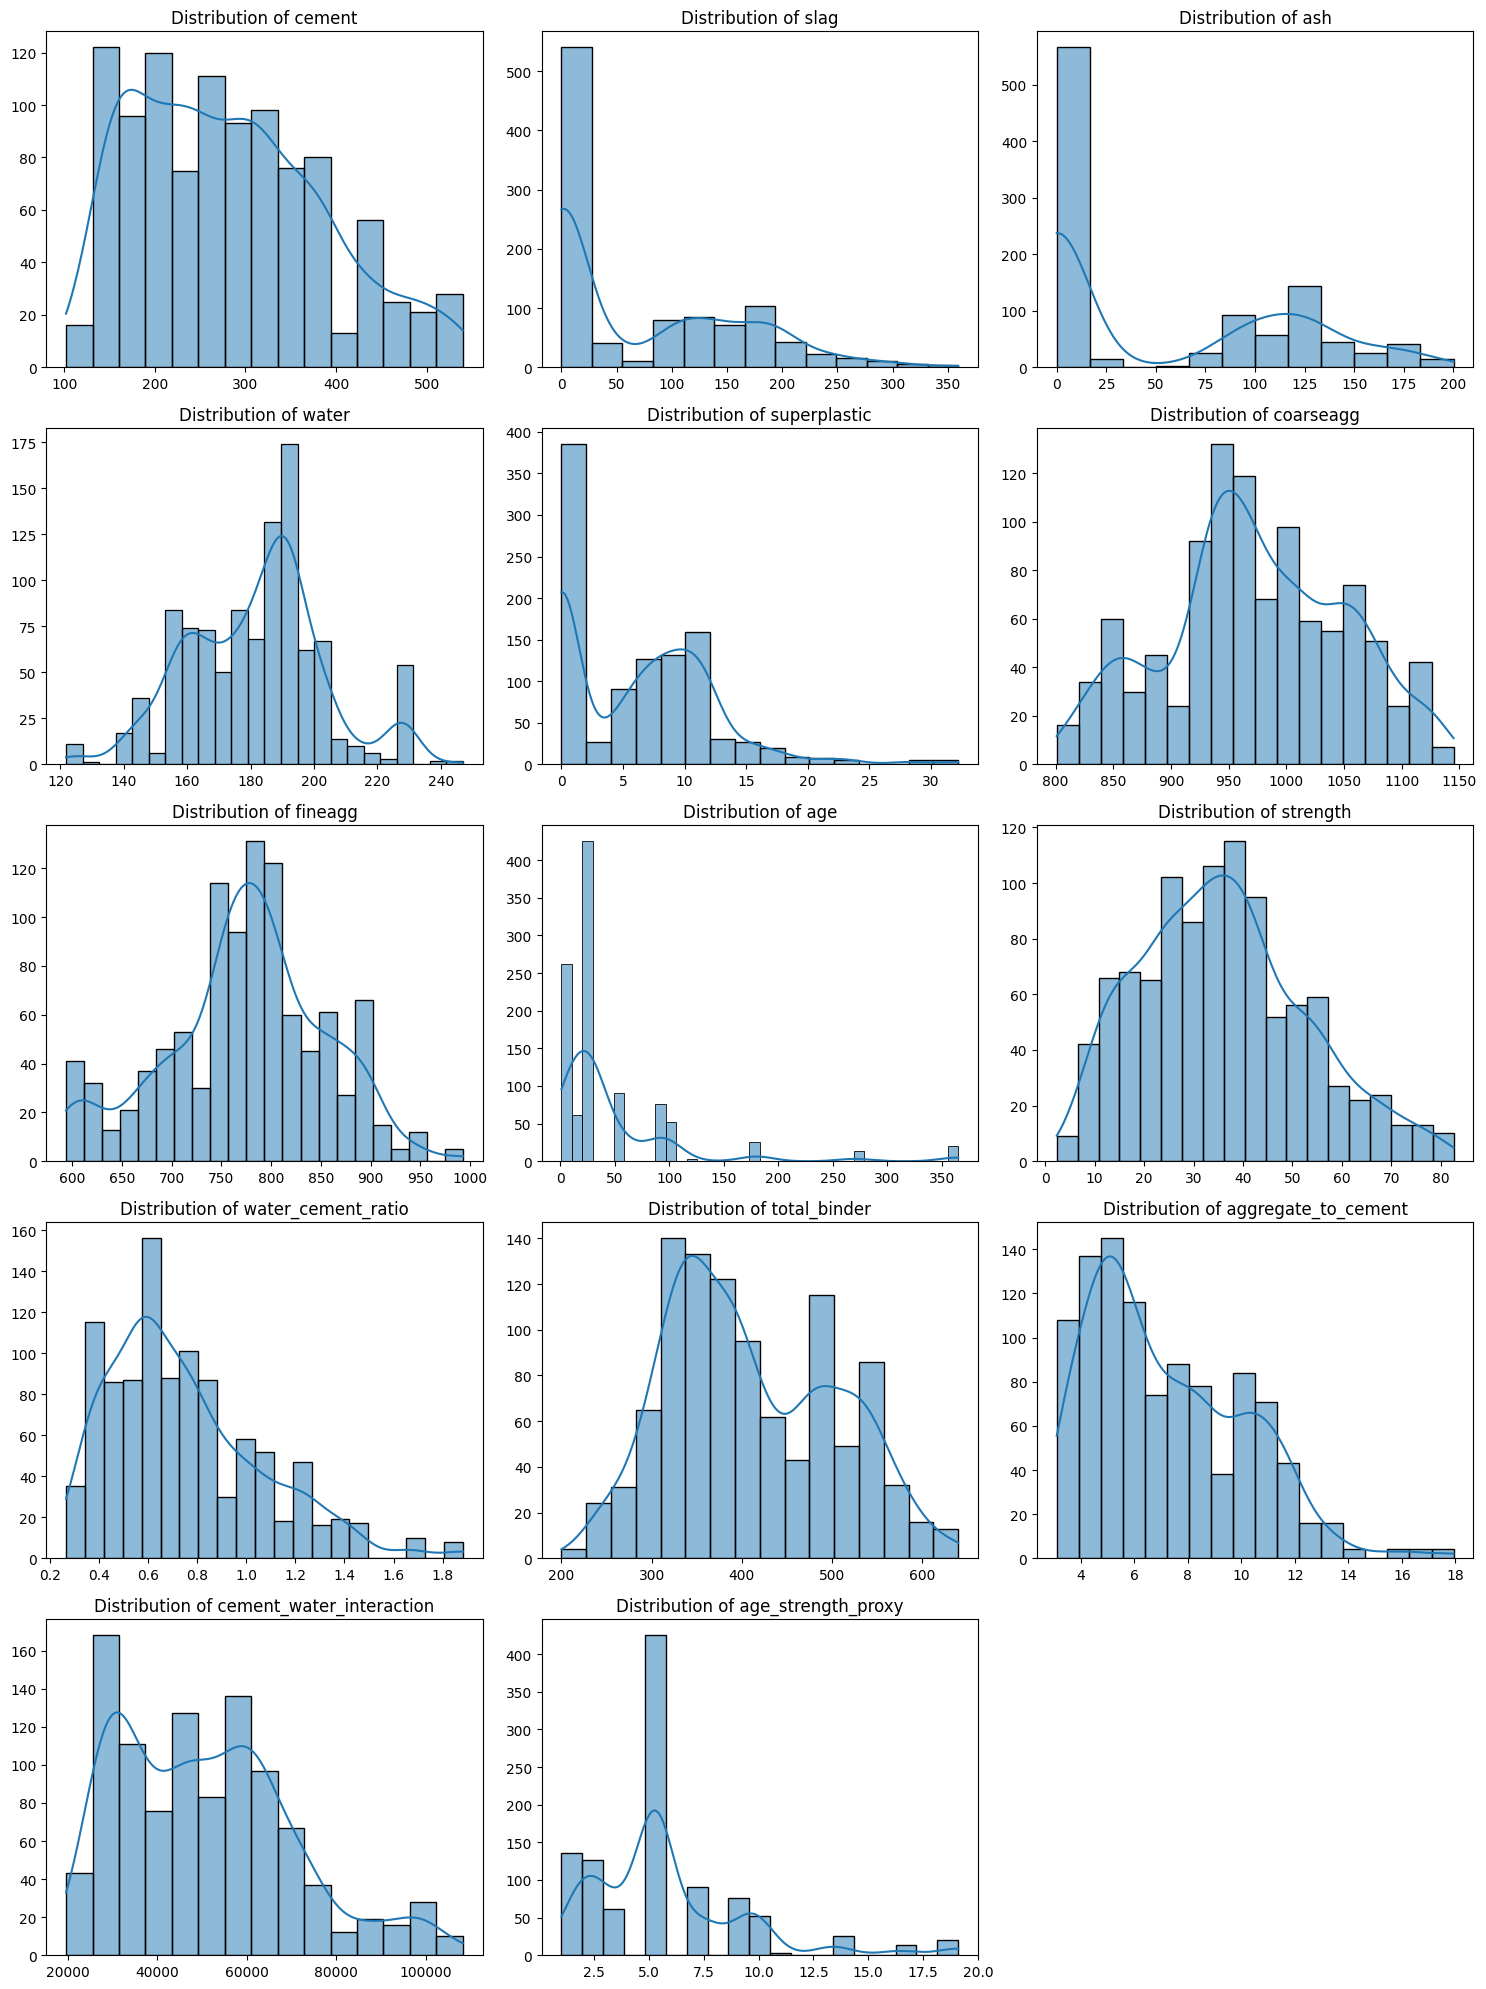

In [10]:
import math

numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Step4: Bivariate Analysis (Feature vs Strength)

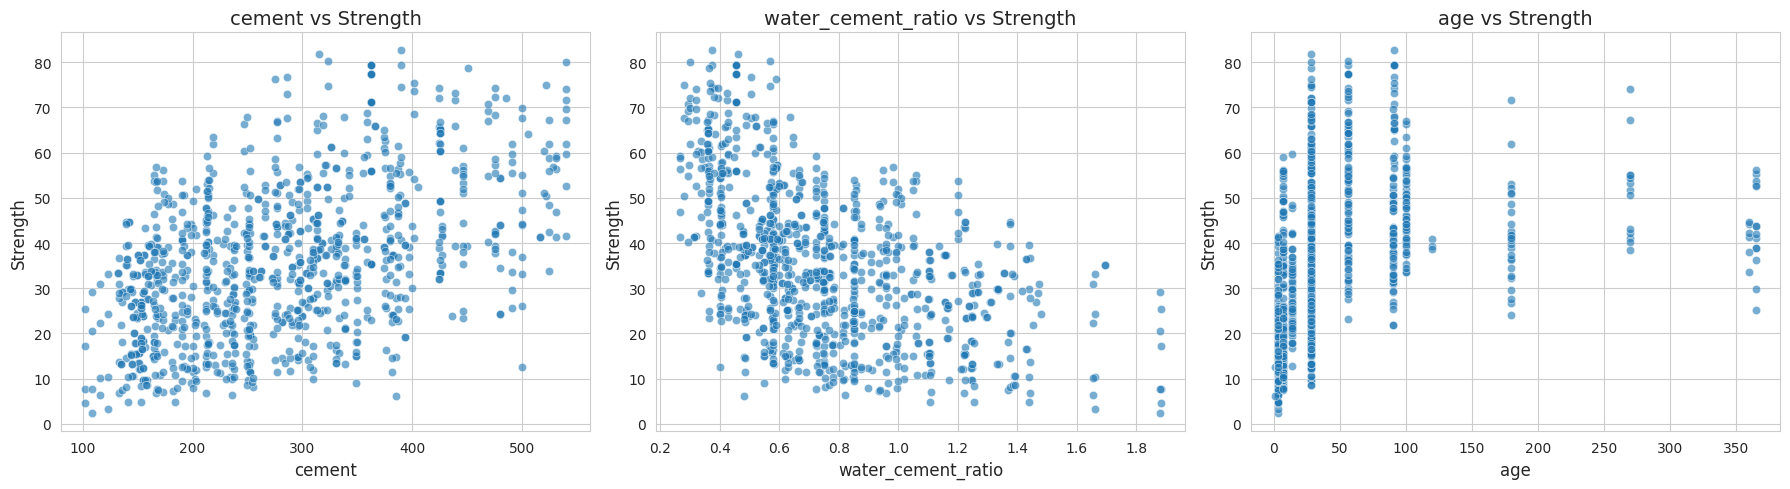

In [11]:
# List of features to plot against strength
bivariate_features = ['cement', 'water_cement_ratio', 'age']

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# Loop through features and create scatter plots
for i, feature in enumerate(bivariate_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=feature, y='strength', alpha=0.6)
    plt.title(f'{feature} vs Strength', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Strength', fontsize=12)

plt.tight_layout()
plt.show()


## Sep5: Correlation Analysis

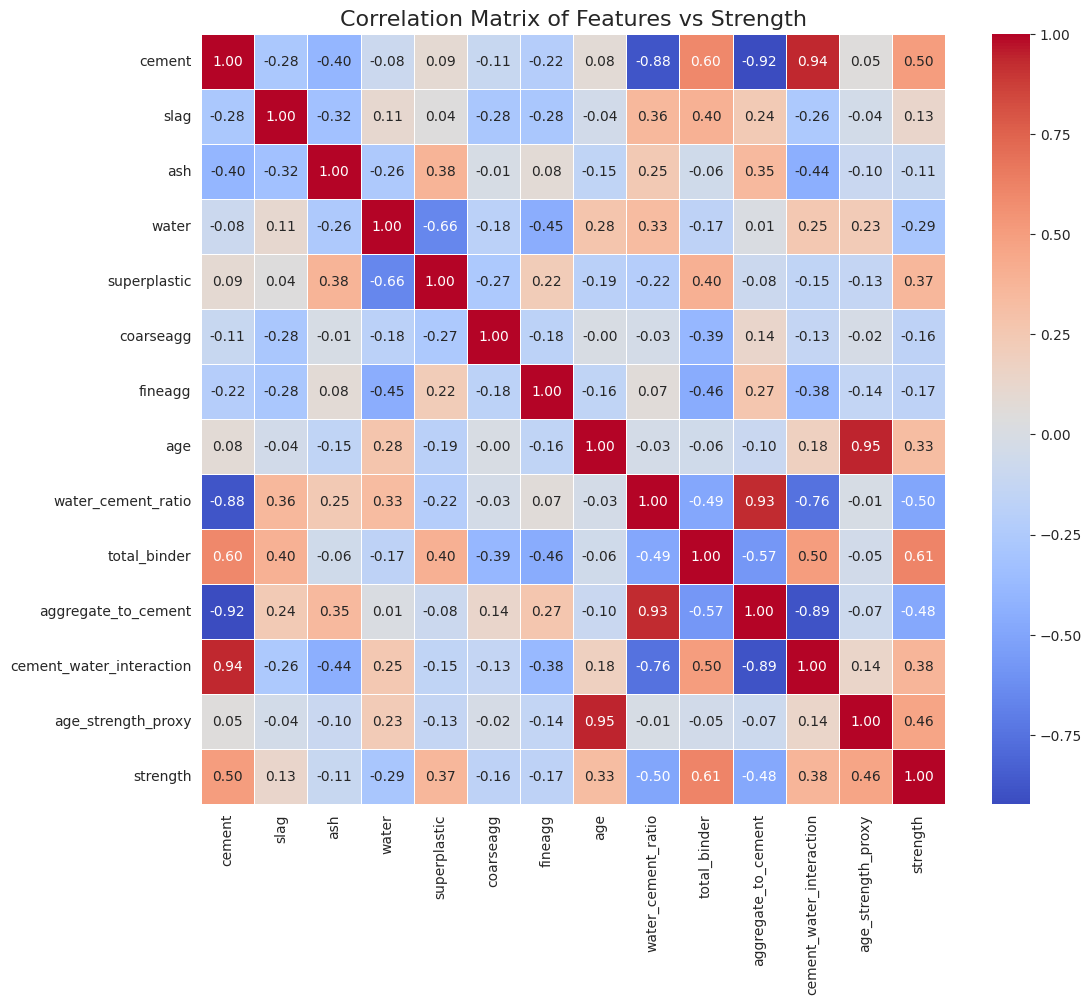

In [12]:
# Select numeric features including target
numeric_features = ['cement', 'slag', 'ash', 'water', 'superplastic',
                    'coarseagg', 'fineagg', 'age', 'water_cement_ratio',
                    'total_binder', 'aggregate_to_cement',
                    'cement_water_interaction', 'age_strength_proxy', 'strength']

# Compute correlation matrix
corr_matrix = df[numeric_features].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features vs Strength", fontsize=16)
plt.show()


## Step6: Engineered Feature Validation

In [13]:
# Raw features
raw_features = ['cement', 'slag', 'ash', 'water', 'superplastic',
                'coarseagg', 'fineagg', 'age']

# Engineered features
engineered_features = ['water_cement_ratio', 'total_binder', 
                       'aggregate_to_cement', 'cement_water_interaction', 
                       'age_strength_proxy']

# Compute correlations
raw_corr = df[raw_features + ['strength']].corr()['strength'].sort_values(ascending=False)
engineered_corr = df[engineered_features + ['strength']].corr()['strength'].sort_values(ascending=False)

print("Raw Feature Correlation with Strength:\n", raw_corr, "\n")
print("Engineered Feature Correlation with Strength:\n", engineered_corr)


Raw Feature Correlation with Strength:
 strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
slag            0.134829
ash            -0.105755
coarseagg      -0.164935
fineagg        -0.167241
water          -0.289633
Name: strength, dtype: float64 

Engineered Feature Correlation with Strength:
 strength                    1.000000
total_binder                0.613184
age_strength_proxy          0.463649
cement_water_interaction    0.376287
aggregate_to_cement        -0.484490
water_cement_ratio         -0.500692
Name: strength, dtype: float64


### 6.1 Pairplots for Visual Validation

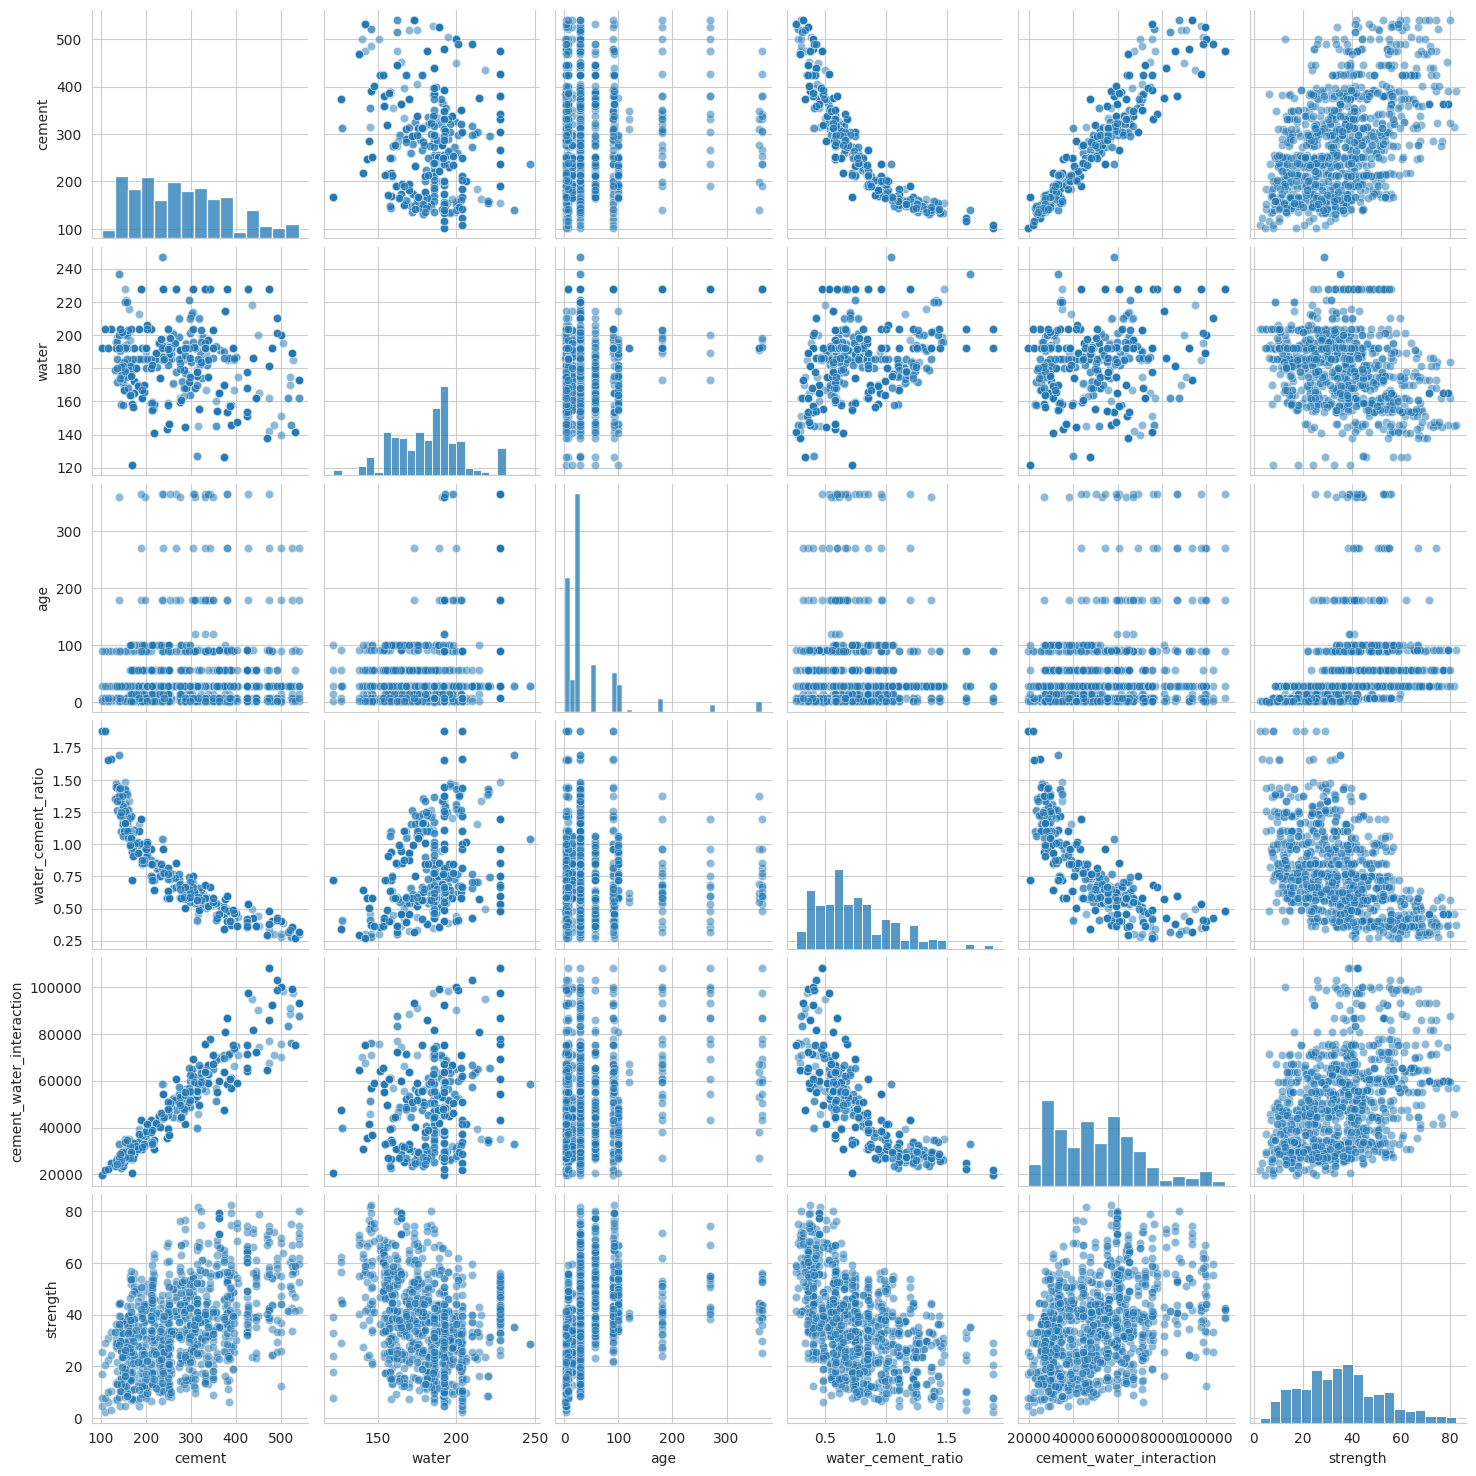

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine important raw + engineered features for visualization
selected_features = ['cement', 'water', 'age', 'water_cement_ratio', 
                     'cement_water_interaction', 'strength']

sns.pairplot(df[selected_features], kind='scatter', plot_kws={'alpha':0.5})
plt.show()


## Step7: Age-Based Strength Analysis

In [15]:
# Define age bins (days)
age_bins = [0, 7, 28, 56, 90, df['age'].max()]  # last bin catches >90 days
age_labels = ['0-7', '8-28', '29-56', '57-90', '90+']

# Create a new column for age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [16]:
# Group by age group and calculate mean strength
age_strength = df.groupby('age_group')['strength'].mean().reset_index()
age_strength


,age_group,strength
0,0-7,22.308397
1,8-28,35.730431
2,29-56,51.890220
3,57-90,40.480370
4,90+,49.551691


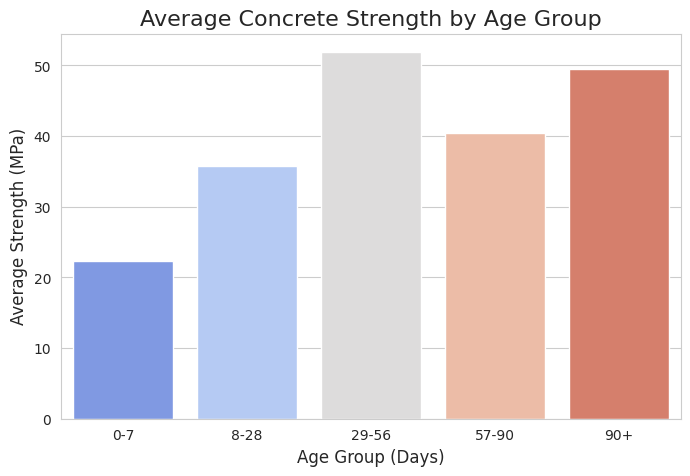

In [17]:
# Plotting
plt.figure(figsize=(8,5))
sns.barplot(data=age_strength, x='age_group', y='strength', palette='coolwarm')
plt.title('Average Concrete Strength by Age Group', fontsize=16)
plt.xlabel('Age Group (Days)', fontsize=12)
plt.ylabel('Average Strength (MPa)', fontsize=12)
plt.show()


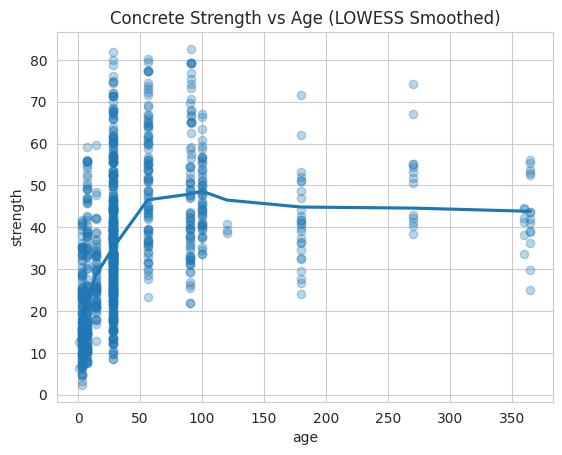

In [18]:
sns.regplot(data=df, x='age', y='strength', lowess=True, scatter_kws={'alpha':0.3})
plt.title("Concrete Strength vs Age (LOWESS Smoothed)")
plt.show()


## Step8: Water–Cement Ratio Bucketing
Converts engineering knowledge into visual proof

In [19]:
# Define bins for water_cement_ratio
wcr_bins = [0, 0.5, 0.75, 1.0, 1.5, df['water_cement_ratio'].max()]
wcr_labels = ['0-0.5', '0.5-0.75', '0.75-1.0', '1.0-1.5', '1.5+']

# Create a new column for water-cement ratio group
df['wcr_group'] = pd.cut(df['water_cement_ratio'], bins=wcr_bins, labels=wcr_labels, include_lowest=True)


In [20]:
# Group by water-cement ratio bin
wcr_strength = df.groupby('wcr_group')['strength'].mean().reset_index()
wcr_strength


,wcr_group,strength
0,0-0.5,49.801603
1,0.5-0.75,36.554093
2,0.75-1.0,28.690383
3,1.0-1.5,25.873000
4,1.5+,18.122778


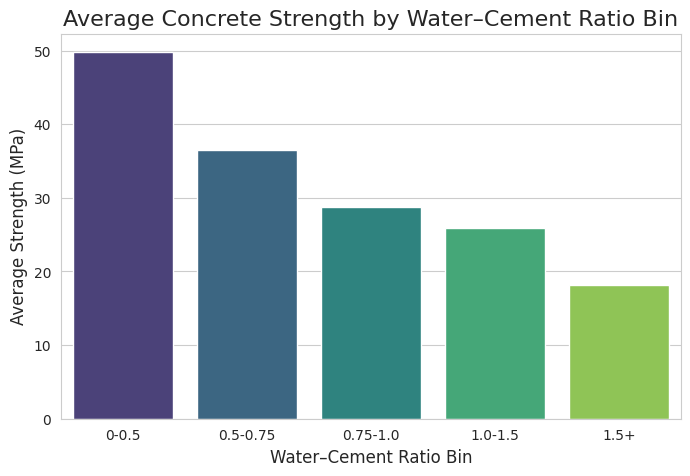

In [21]:
# Plotting
plt.figure(figsize=(8,5))
sns.barplot(data=wcr_strength, x='wcr_group', y='strength', palette='viridis')
plt.title('Average Concrete Strength by Water–Cement Ratio Bin', fontsize=16)
plt.xlabel('Water–Cement Ratio Bin', fontsize=12)
plt.ylabel('Average Strength (MPa)', fontsize=12)
plt.show()


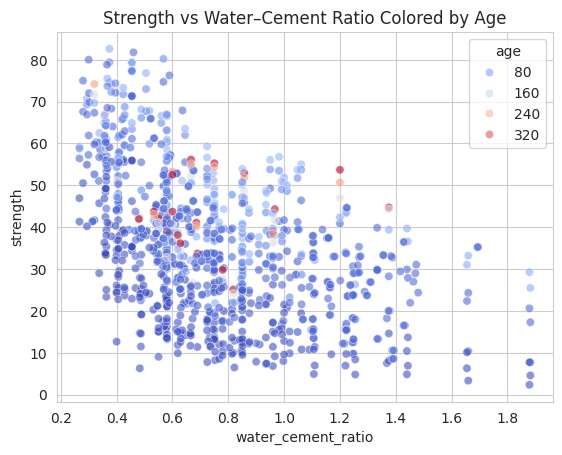

In [22]:
sns.scatterplot(data=df, x='water_cement_ratio', y='strength', hue='age', palette='coolwarm', alpha=0.6)
plt.title('Strength vs Water–Cement Ratio Colored by Age')
plt.show()


## Step9: Outlier Analysis Using Zcore

In [23]:
from scipy import stats

# Numeric features to check
numeric_features = [
    'cement', 'slag', 'ash', 'water', 'superplastic',
    'coarseagg', 'fineagg', 'age', 'strength',
    'water_cement_ratio', 'total_binder',
    'aggregate_to_cement', 'cement_water_interaction',
    'age_strength_proxy'
]
# Create Z-score columns dynamically
for col in numeric_features:
    df[f'{col}'] = np.abs(stats.zscore(df[col]))
z_threshold = 3

for col in numeric_features:
    outliers = df[df[f'{col}'] > z_threshold]
    print(f"{col}: {len(outliers)} outliers")

cement: 0 outliers
slag: 4 outliers
ash: 0 outliers
water: 2 outliers
superplastic: 10 outliers
coarseagg: 0 outliers
fineagg: 0 outliers
age: 33 outliers
strength: 0 outliers
water_cement_ratio: 10 outliers
total_binder: 0 outliers
aggregate_to_cement: 8 outliers
cement_water_interaction: 0 outliers
age_strength_proxy: 33 outliers


## Step10: Multicollinearity Check

Variance Inflation Factor (VIF)

🎯 Why

Linear models fail with correlated predictors

Helps feature selection

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Features to check (exclude target)
features_for_vif = ['cement', 'slag', 'ash', 'water', 'superplastic',
                    'coarseagg', 'fineagg', 'age', 'water_cement_ratio',
                    'total_binder', 'aggregate_to_cement', 'cement_water_interaction', 
                    'age_strength_proxy']

X = clean_df[features_for_vif]
# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))


NameError: name 'clean_df' is not defined

## Step 11: Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
features = [
    'cement', 'slag', 'ash', 'water', 'superplastic',
    'coarseagg', 'fineagg', 'age',
    'water_cement_ratio', 'total_binder',
    'aggregate_to_cement', 'cement_water_interaction'
]

target = 'strength'

X = clean_df[features]
y = clean_df[target].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "X_train": X_train_scaled,
        "X_test": X_test_scaled
    },
    "Random Forest": {
        "model": RandomForestRegressor(
            n_estimators=200,
            random_state=42
        ),
        "X_train": X_train_raw,
        "X_test": X_test_raw
    },
    "XGBoost": {
        "model": xgb.XGBRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        ),
        "X_train": X_train_raw,
        "X_test": X_test_raw
    }
}


In [ ]:
results = []

for name, config in models.items():
    model = config["model"]
    X_tr = config["X_train"]
    X_te = config["X_test"]

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2": r2
    })

    print(f"{name} | RMSE: {rmse:.2f} | R²: {r2:.3f}")


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df
best_model_name = results_df.iloc[0]["Model"]
print(f"🏆 Best Model Based on RMSE: {best_model_name}")


<div style="font-family: 'Arial', sans-serif; max-width: 800px; margin: auto; padding: 20px; border: 2px solid #ddd; border-radius: 12px; background: #f9f9f9; text-align: center; box-shadow: 0 4px 10px rgba(0,0,0,0.1);">

  <h2 style="color:#2c3e50;">👍 If you found this analysis helpful, give it a vote!</h2>
  
  <p style="font-size:16px; color:#555;">
    📝 Notice any issue or want to explore further analysis?  
    Feel free to leave your feedback or suggestions.  
  </p>
  
  <div style="margin-top:20px;">
    <a href="#" style="text-decoration:none; padding:12px 25px; background-color:#16a085; color:white; font-weight:bold; border-radius:8px; margin-right:10px;">Vote 👍</a>
    <a href="#" style="text-decoration:none; padding:12px 25px; background-color:#e67e22; color:white; font-weight:bold; border-radius:8px;">Feedback ✍️</a>
  </div>

  <p style="font-size:14px; color:#999; margin-top:15px;">Your support and feedback help improve the analysis! 🌟</p>
</div>
